In [1]:
!pip install numpy pandas scikit-learn


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# Load the Boston Housing dataset
# boston = load_boston()
# data = pd.DataFrame(boston.data, columns=boston.feature_names)
# data['PRICE'] = boston.target

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target


In [7]:
# Select features and target variable
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


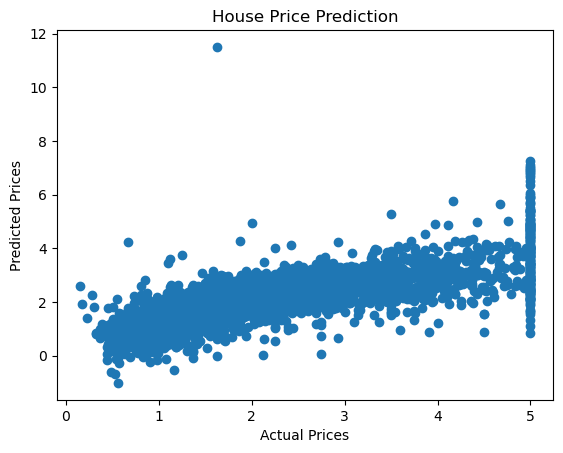

In [12]:
# Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('House Price Prediction')
plt.show()

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# Define the model
lasso = Lasso()

# Define the hyperparameters to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [16]:
# Use mean squared error as the scoring metric for hyperparameter tuning
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [17]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [18]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

In [19]:
# Train the model with the best hyperparameters on the entire training set
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [20]:
# Evaluate the model on the validation set
val_predictions = best_lasso.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_r_squared = best_lasso.score(X_val, y_val)

In [21]:
print(f"Best Alpha: {best_alpha}")
print(f"Validation Mean Squared Error: {val_mse}")
print(f"Validation R-squared: {val_r_squared}")

Best Alpha: 0.001
Validation Mean Squared Error: 0.5387132239019644
Validation R-squared: 0.6096246676329776


In [22]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [25]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [26]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)

In [27]:
# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R-squared: {r2}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation Mean Squared Error: 0.25403502977349207
Validation R-squared: 0.8061406522759711


In [29]:
# Create a Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_test)

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
# Corrected format specifier
print("Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}")
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R-squared: {r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation Mean Squared Error: 0.2947116064316427
Validation R-squared: 0.7750995213515209
